In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [90]:
games=pd.read_csv('games.csv')


In [91]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [92]:
print(games.shape)

(81312, 20)


(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

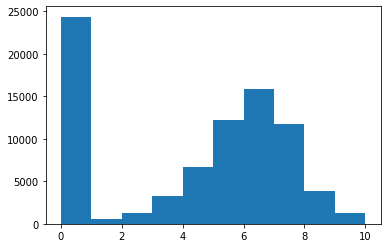

In [93]:
plt.hist(games['average_rating'])

In [94]:
plt.show(0)

In [95]:
print(games[games['average_rating']==0].iloc[0])
print(games[games['average_rating']>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

In [96]:
games=games[games["users_rated"]>0]

In [97]:
print(games.shape)

(56932, 20)


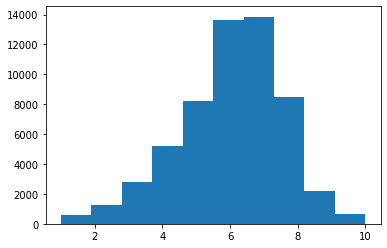

In [98]:
plt.hist(games['average_rating'])
plt.show()

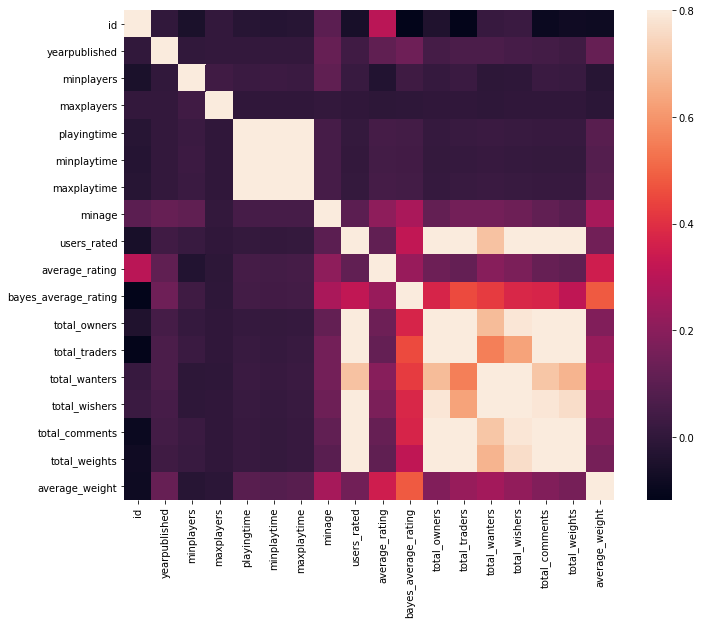

In [99]:
corrmat=games.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [100]:
games=games.dropna(axis=0)

In [101]:
columns=games.columns.tolist()
columns=[c for c in columns if c not in["id","type","name","average_rating","bayes_average_rating"]]
target="average_rating"

In [102]:
from sklearn.model_selection import train_test_split
train=games.sample(frac=0.8,random_state=1)
test=games.loc[~games.index.isin(train.index)]
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [103]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#initialise the model class
LR=LinearRegression()

#fit the model to the training dataset
LR.fit(train[columns],train[target])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
SCORE=LR.score(train[columns],train[target])
print(SCORE)

0.15862848355208325


In [104]:
#generating predictions for testing set
predictions=LR.predict(test[columns])
mean_squared_error(predictions,test[target])

2.078819032629326

In [134]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression


# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(train[columns])
poly_reg.fit(X_poly, train[target])
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, train[target])


KeyboardInterrupt: 

In [107]:
#import random forest regression
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)
RFR.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [133]:
SCORE1=RFR.score(test[columns],test[target])
print(SCORE1)

0.4200452526656795


In [108]:
predictions=RFR.predict(test[columns])
mean_squared_error(predictions,test[target])

1.4458560046071653

In [109]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [117]:
ratingLR=LR.predict(test[columns].iloc[0].values.reshape(1,-1))
ratingRFR=RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

In [118]:
print(ratingLR)


[8.12061283]
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)


In [119]:
print(ratingRFR)

[7.91373581]


In [121]:
test[target].iloc[0]

8.07933

In [136]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
train[columns]=sc_X.fit_transform(train[columns].values.reshape(1,-1))
train[target]=sc_y.fit_transform(train[target].values.reshape(1,-1))

ValueError: Must have equal len keys and value when setting with an ndarray

In [ ]:
#using SVR model
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(train[columns],train[target])